In [1]:
import sys

sys.path.insert(0, "/home/twright/Documents/PhD/Notebooks")

In [2]:
%display latex
from lbuc import *
from flowstar import *
from lbuc.bondcalculus import *

In [3]:
R.<x1,x2,x3,x4,x5,x6,x7,x8,x9> = RIF[]

In [4]:
y = vector([
    10*x3 - RIF('0.1')*x1*x6,
    100*x4 - x1*x2,
    RIF('0.1')*x1*x6 - 50*x3,
    x2*x6 - 100*x4,
    5*x3 + RIF('0.5')*x1 - 10*x5,
    50*x5 + 50*x3 + 100*x4 - x6*(RIF('0.1')*x1 + x2 + 2*x8 + 1),
    50*x4 + RIF('0.01')*x2 - RIF('0.5')*x7,
    RIF('0.5')*x7 - 2*x6*x8 + x9 - RIF('0.2')*x8,
    2*x6*x8 - x9,
])

In [5]:
table([[yi] for yi in y])

""
""
""
""
""
""
""
""
""


In [6]:
y0 = [
    RIF('[0.98, 1.02]'),
    RIF('[1.28, 1.32]'),
    RIF('[0.08, 0.12]'),
    RIF('[0.08, 0.12]'), # x4
    RIF('[0.08, 0.12]'),
    RIF('[1.28, 1.32]'), # x6
    RIF('[2.48, 2.52]'),
    RIF('[0.58, 0.62]'),
    RIF('[1.28, 1.32]'),
]

In [7]:
table([y0i.endpoints() for y0i in y0])

,
,
,
,
,
,
,
,
,


In [8]:
sys = System(R, R.gens(), y0, y); sys

System(R, (x1, x2, x3, x4, x5, x6, x7, x8, x9), [[0.97999999999999998 .. 1.0200000000000001], [1.2799999999999998 .. 1.3200000000000001], [0.079999999999999987 .. 0.12000000000000001], [0.079999999999999987 .. 0.12000000000000001], [0.079999999999999987 .. 0.12000000000000001], [1.2799999999999998 .. 1.3200000000000001], [2.4799999999999999 .. 2.5200000000000001], [0.57999999999999996 .. 0.62000000000000011], [1.2799999999999998 .. 1.3200000000000001]], (-0.10000000000000000?*x1*x6 + 10*x3, -x1*x2 + 100*x4, 0.10000000000000000?*x1*x6 - 50*x3, x2*x6 - 100*x4, 0.50000000000000000?*x1 + 5*x3 - 10*x5, -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6, 0.01000000000000000?*x2 + 50*x4 - 0.50000000000000000?*x7, -2*x6*x8 + 0.50000000000000000?*x7 - 0.2000000000000000?*x8 + x9, 2*x6*x8 - x9), varmap=bidict({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5, 'x6': x6, 'x7': x7, 'x8': x8, 'x9': x9}))

In [9]:
def test_monitoring(prop, duration, **kwargs):
    t0 = time.time()
    sig = prop.signal_for_system(sys,
    duration, order=4, step=0.003,
    precondition=1,
    estimation=1e-1,
    max_remainder_queue=100,
    integration_method=IntegrationMethod.ONLY_PICARD_SYMB,
    cutoff_threshold=1e-6,
    **kwargs)
    t1 = time.time()
    print(f"Run done in {t1 - t0} sec\noptions: {repr(kwargs)}")
    return t1 - t0, sig

In [10]:
prop = Atomic(var("x6") > 1.4)
prop

Atomic(x6 > 1.40000000000000)

Precomposing Contexts: 1 items in 0.00 seconds
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
entering managed function _init_args
entering global manager
num_flowpipes [reported]: 0
num_flowpipes: 0
global num_flowpipes: 0 flowpipes
system with dimension 0
swapping variables
=== before ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 0 flowpipes
global [external]: 0 flowpipes
stored: 1869901409 flowpipes
=== after ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
global [reported]: 1869901409 flowpipes
global [external]: 1869901409 flowpipes
st

=== after ===
global: 0 dim
local: 9 dim
global: 0 flowpipes
global [reported]: 0 flowpipes
global [external]: 0 flowpipes
stored: 1334 flowpipes
stack: []
num_flowpipes [reported]: 0
global num_flowpipes: 0 flowpipes
num_flowpipes: 0
system with dimension 0
entering global manager
num_flowpipes [reported]: 0
num_flowpipes: 0
global num_flowpipes: 0 flowpipes
system with dimension 0
swapping variables
=== before ===
global: 0 dim
local: 9 dim
global: 0 flowpipes
global [reported]: 0 flowpipes
global [external]: 0 flowpipes
stored: 1334 flowpipes
=== after ===
global: 9 dim
local: 0 dim
global: 1334 flowpipes
global [reported]: 1334 flowpipes
global [external]: 1334 flowpipes
stored: 0 flowpipes
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f3b074bbec0>]
num_flowpipes [reported]: 1334
global num_flowpipes: 1334 flowpipes
num_flowpipes: 1334
system with dimension 9
exiting global manager
num_flowpipes [reported]: 1334
global num_flowpipes: 1334 flowpipes
num_flowpip

=== after ===
global: 0 dim
local: 9 dim
global: 0 flowpipes
global [reported]: 0 flowpipes
global [external]: 0 flowpipes
stored: 1334 flowpipes
stack: []
num_flowpipes [reported]: 0
global num_flowpipes: 0 flowpipes
num_flowpipes: 0
system with dimension 0
Monitoring Signal for x6 > 1.40000000000000: 1 items in 10.21 seconds
Monitored signal in 10.21803737099799 sec
ran "root detection" 100 times in 0.3266746997833252
ran "check boolean [unguarded]" 3 times in 0.00027251243591308594
ran "observer.check" 3 times in 0.0022695064544677734
ran "post retrieve" 100 times in 0.0005271434783935547
ran "prepare in check" 3 times in 0.0010478496551513672
ran "tentative eval" 1334 times in 1.010026216506958
ran "restoring globals" 9 times in 1.6863176822662354
ran "root amalgamation" 100 times in 6.747245788574219e-05
ran "capturing globals [on exit]" 9 times in 3.3102691173553467
ran "composing flowpipe" 102 times in 3.3165855407714844
ran "whole domain eval" 102 times in 0.16027450561523438
r

/usr/lib64/python3.7/site-packages/numpy/core/getlimits.py:400: UserWarning: Signature b'\x99\x99\x99\x99\x99\x99\xb9\xbf' for <class 'numpy.float64'> does not match any known type: falling back to type probe function
  machar = _get_machar(dtype)


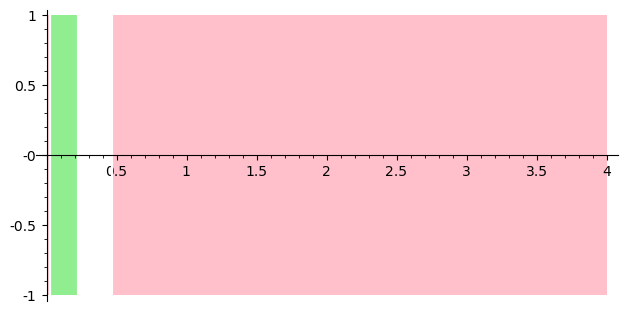

In [11]:
test_monitoring(prop, 4, use_masks=False)[1].plot()

In [12]:
#test_monitoring(prop, 4, use_masks=False, tentative_unpreconditioning=False)[1].plot()

In [13]:
#test_monitoring(prop, 4, use_masks=False, tentative_unpreconditioning=False, precompose_flowpipes=True)[1].plot()

In [14]:
#maskA = Mask(RIF(0, 4), [RIF(1, 1.5)])
#maskA.plot()

In [15]:
#test_monitoring(prop, 4, mask=maskA)[1].plot()

In [16]:
#zebra_mask = Mask(RIF(0, 4), [RIF(2*k/10, (2*k + 1)/10) for k in range(21)])
#zebra_mask.plot()

In [17]:
#test_monitoring(prop, 4, mask=zebra_mask)[1].plot()